****
# **Student Name:** Zhiheng Zhou

# **Student ID:** 260955157
****

# **Path**

In [1]:
path_train='/content/drive/MyDrive/ECSE415/Colab Notebooks_A3/Data/HoG/Train/'
path_test='/content/drive/MyDrive/ECSE415/Colab Notebooks_A3/Data/HoG/Test/'
path_georgia='/content/drive/MyDrive/ECSE415/Colab Notebooks_A3/Data/FaceRecognition/GeorgiaTechDataBase/'
path_mapping='/content/drive/MyDrive/ECSE415/Colab Notebooks_A3/Data/FaceRecognition/mapping.csv'

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import skimage
import glob
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from skimage.exposure import rescale_intensity
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

import cv2
import numpy as np

%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# **Read Image**

*   HoG_Train


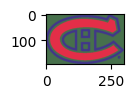

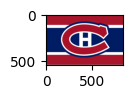

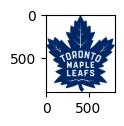

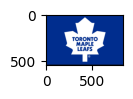

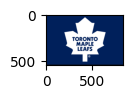

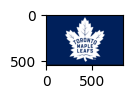

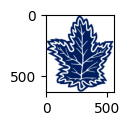

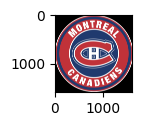

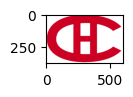

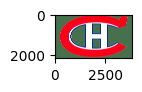

In [2]:
imgHoGTrain = [cv2.imread(file) for file in glob.glob(path_train + "*.png")]
for i in range(0, len(imgHoGTrain)):
  imgHoGTrain[i] = cv2.cvtColor(imgHoGTrain[i], cv2.COLOR_BGR2RGB)
  plt.figure(figsize=(1,1))
  plt.imshow(imgHoGTrain[i])
  plt.show()

* HoG_Test

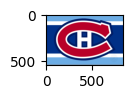

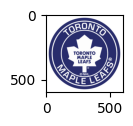

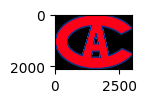

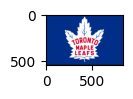

In [3]:
imgHoGTest = [cv2.imread(file) for file in glob.glob(path_test + "*.png")]
for i in range(0, len(imgHoGTest)):
  imgHoGTest[i] = cv2.cvtColor(imgHoGTest[i], cv2.COLOR_BGR2RGB)
  plt.figure(figsize=(1,1))
  plt.imshow(imgHoGTest[i])
  plt.show()

# **1. Classification using HoG**

1.1 Build classifier with training images

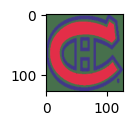

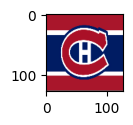

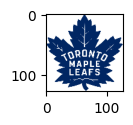

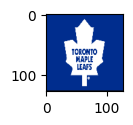

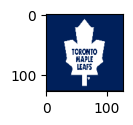

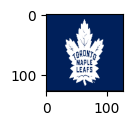

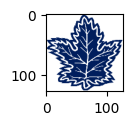

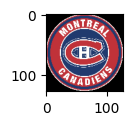

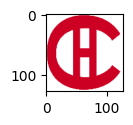

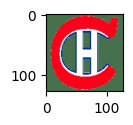

In [4]:
# Resize image
for i in range(0, len(imgHoGTrain)):
  imgHoGTrain[i] = cv2.resize(imgHoGTrain[i], (128, 128))
  plt.figure(figsize=(1,1))
  plt.imshow(imgHoGTrain[i])
  plt.show()

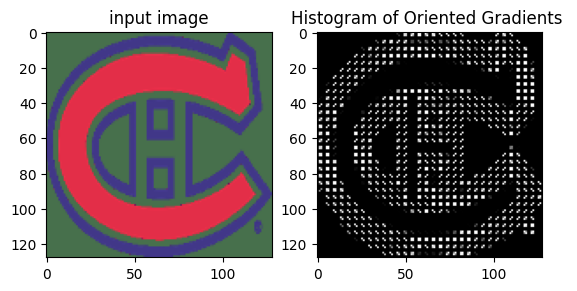

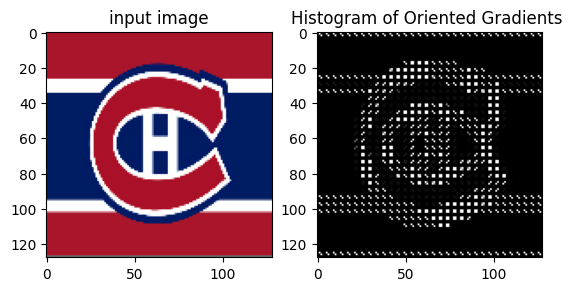

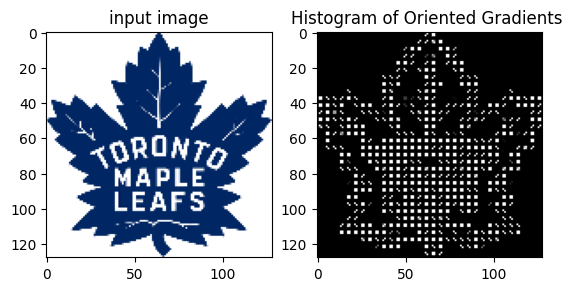

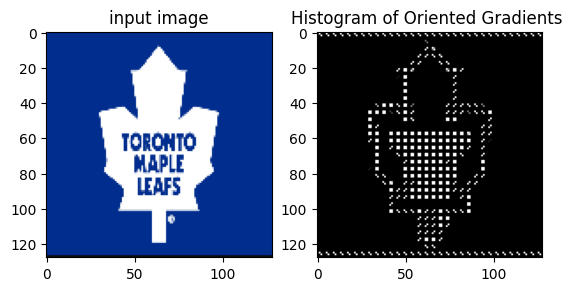

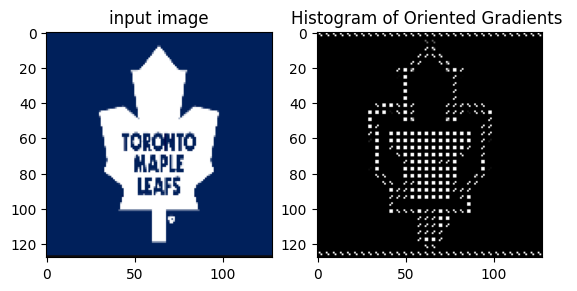

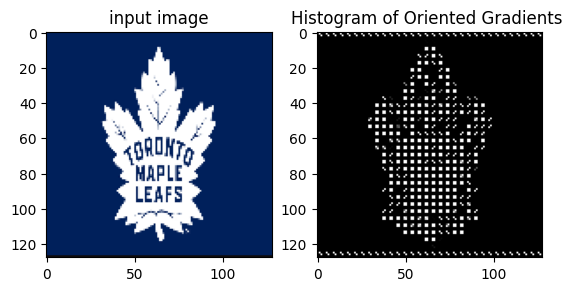

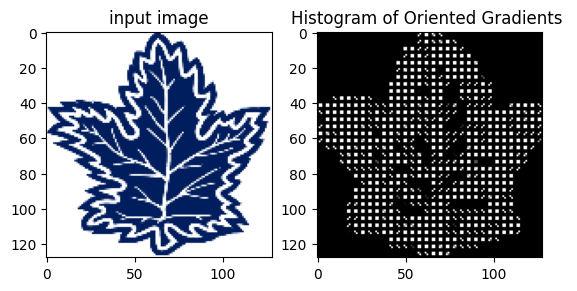

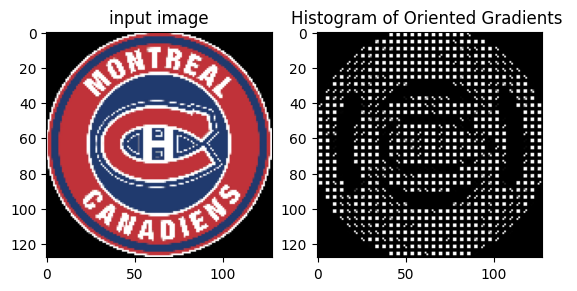

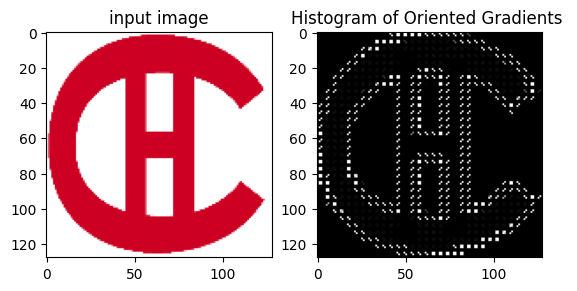

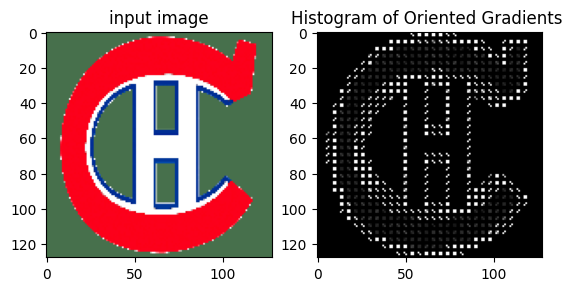

In [5]:
# Compute HoG features of size (32,32,8) for all training images
feature_train = []
for i in range(0, len(imgHoGTrain)):
 fd, hog_image = skimage.feature.hog(imgHoGTrain[i], orientations=8, pixels_per_cell=(4, 4),
                    cells_per_block=(4, 4), visualize=True, channel_axis=-1)
 feature_train.append(fd)

 # Rescale histogram for better display
 hogTrain_rescaled = rescale_intensity(hog_image, in_range=(0, 10))
 plt.subplot(121)
 plt.imshow(imgHoGTrain[i])
 plt.title("input image")
 plt.subplot(122)
 plt.imshow(hogTrain_rescaled, cmap=plt.cm.gray)
 plt.title("Histogram of Oriented Gradients ")
 plt.show()

feature_train = np.array(feature_train)

In [6]:
# Fit a nearest neighbor classifier with three neighbors
KNN = KNeighborsClassifier(n_neighbors=3 ,algorithm='brute')
train_y = [0,0,1,1,1,1,1,0,0,0] # Montreal = 0, Tronto = 1
KNN.fit(feature_train, train_y)

KNeighborsClassifier(algorithm='brute', n_neighbors=3)

1.2 Classify Test Images

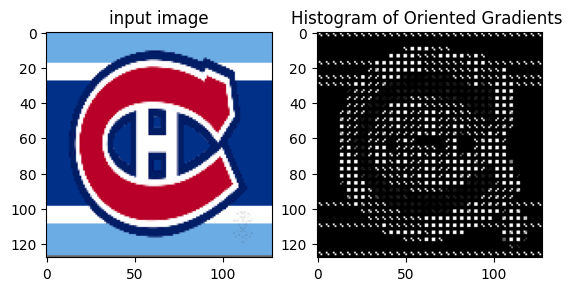

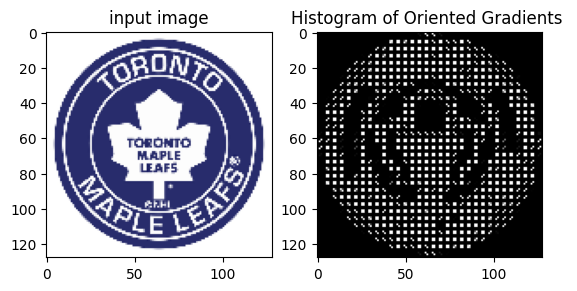

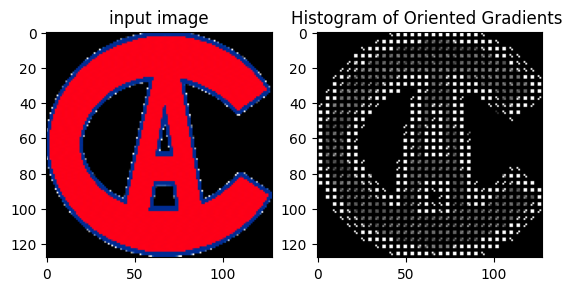

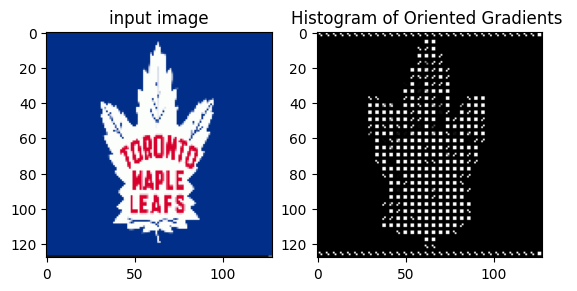

In [7]:
# Resize images
for i in range(0, len(imgHoGTest)):
  imgHoGTest[i] = cv2.resize(imgHoGTest[i], (128, 128))

# Compute HoG features for all the test image
feature_test = []
for i in range(0, len(imgHoGTest)):
 fdTest, hog_imageTest = skimage.feature.hog(imgHoGTest[i], orientations=8, pixels_per_cell=(4, 4),
                    cells_per_block=(4, 4), visualize=True, channel_axis=-1)
 feature_test.append(fdTest)

 # Rescale histogram for better display
 hogTest_rescaled = rescale_intensity(hog_imageTest, in_range=(0, 4))
 plt.subplot(121)
 plt.imshow(imgHoGTest[i])
 plt.title("input image")
 plt.subplot(122)
 plt.imshow(hogTest_rescaled, cmap=plt.cm.gray)
 plt.title("Histogram of Oriented Gradients ")
 plt.show()

feature_test = np.array(feature_test)

In [8]:
# Test accuracy
print("Predicted test data:")
test_predict = KNN.predict(feature_test)
print(test_predict)
print("Expected result")
test_y = [0,1,0,1]
print(test_y)
KNN.score(feature_test, test_y)

Predicted test data:
[1 0 0 1]
Expected result
[0, 1, 0, 1]


0.5

* Rotate images to test the classifier



In [9]:
import random

imgHoGTestRotated = []
feature_test_rotated = []

# rotate test images randomly
for i in range(0, len(imgHoGTest)):
  # Get image centre
  h = imgHoGTest[i].shape[1]
  w = imgHoGTest[i].shape[0]
  centre = (h/2, w/2)
  scale = 1

  rotation = cv2.getRotationMatrix2D(center = centre, angle = random.randint(0,360), scale = scale)
  imgHoGTestRotated.append(cv2.warpAffine(imgHoGTest[i], rotation, (h,w)))

# Compute HoG features for all roated test images
for i in range(0, len(imgHoGTestRotated)):
 fdTestRotated, hog_imageTest = skimage.feature.hog(imgHoGTest[i], orientations=8, pixels_per_cell=(4, 4),
                    cells_per_block=(4, 4), visualize=True, channel_axis=-1)
 feature_test_rotated.append(fdTestRotated)

# Test accuracy
print("Predicted test data:")
test_predict = KNN.predict(feature_test_rotated)
print(test_predict)
print("Expected result")
test_y = [0,1,0,1]
print(test_y)
KNN.score(feature_test_rotated, test_y)

Predicted test data:
[1 0 0 1]
Expected result
[0, 1, 0, 1]


0.5

The classifier's accuracy is 0.5, indicating it doesn't perform well on every test image. A limited amount of training data could be a contributing factor to this low accuracy.

After subjecting the test images to random rotations, the classifier maintains its accuracy at 0.5.Thus, HoG is still effective despite random rotations of the logo images. Local orientation allows HoG to be robust to changes in orientation.

However, its robutness may also due to the random rotations are relatively small. When the rotations are big, HoG may not be effective enough. Under this circumstance, we can use a keypoint detector, like SIFT, to identify distinctive points in the logos, and then match the keypoints between the rotated logos and a reference image of the logo without any rotation to regain the uniform orientation of the logos.


# **2. Face Recognition System**

1. Data Processing

In [10]:
# Load csv data
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

csv = pd.read_csv(path_mapping)
csv = np.array(csv)
label = csv[:, 1]

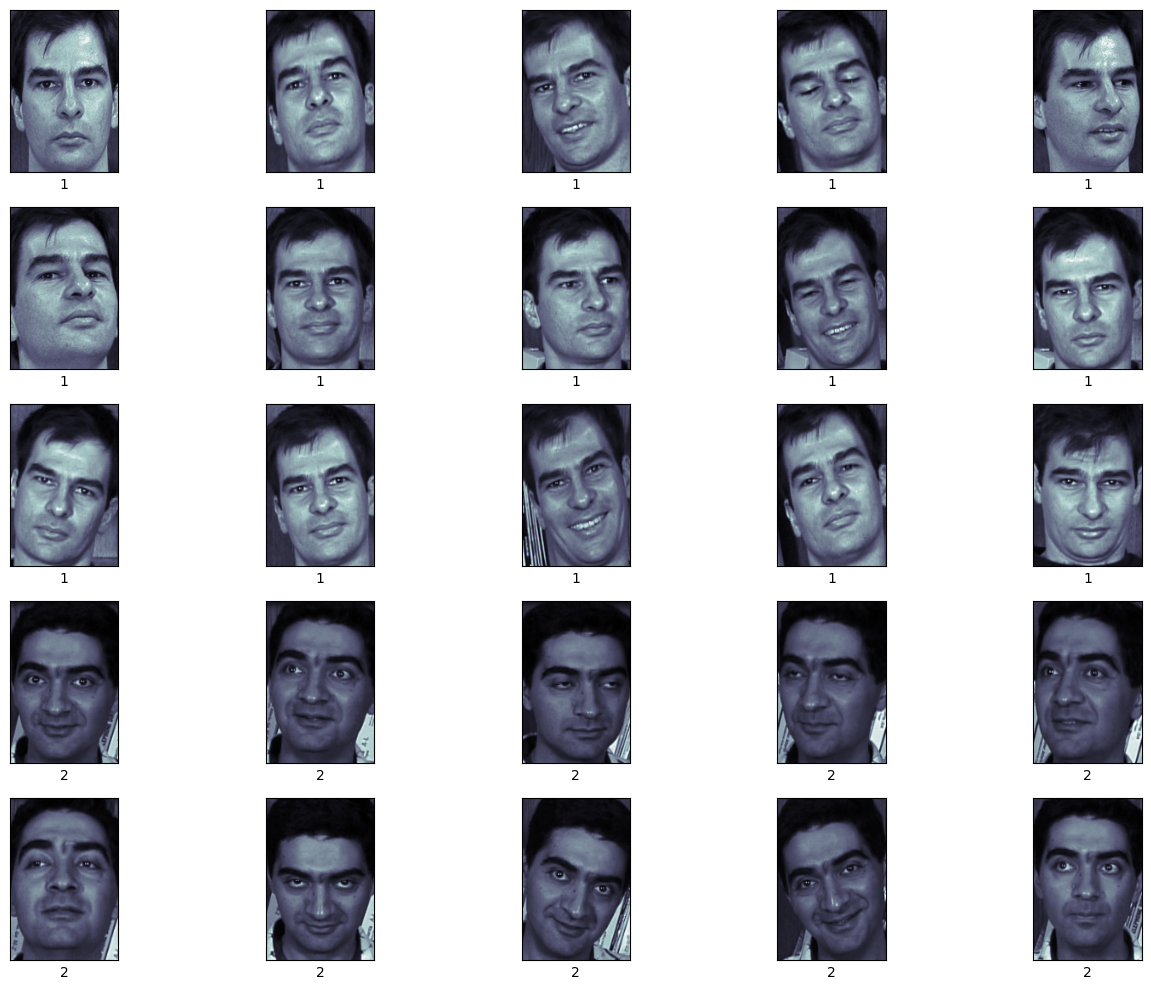

In [11]:
# Load image
fileGeorgia = glob.glob(path_georgia + "/*.jpg")
fileGeorgia.sort()
imgGeorgia = [cv2.imread(img) for img in fileGeorgia]

# Grayscale and reshape Georgia face
for i in range (0,len(imgGeorgia)):
  imgGeorgia[i] = cv2.cvtColor(imgGeorgia[i], cv2.COLOR_BGR2RGB)
  imgGeorgia[i] = cv2.cvtColor(imgGeorgia[i], cv2.COLOR_RGB2GRAY)
  imgGeorgia[i] = cv2.resize(imgGeorgia[i],(128,192))

# Display images with lables
fig, ax = plt.subplots(5, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(imgGeorgia[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=label[i])

    fig.set_figwidth(15)
    fig.set_figheight(10)
    fig.tight_layout()

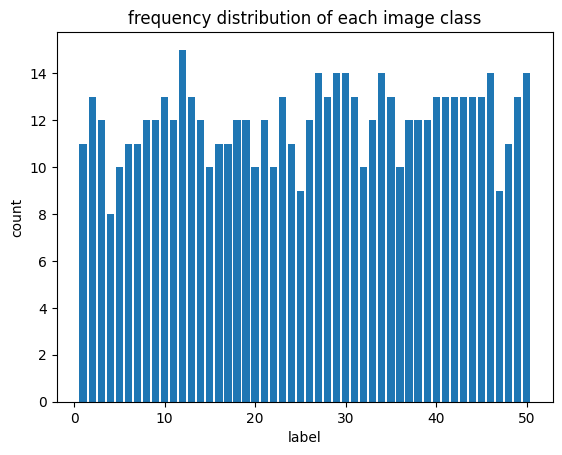

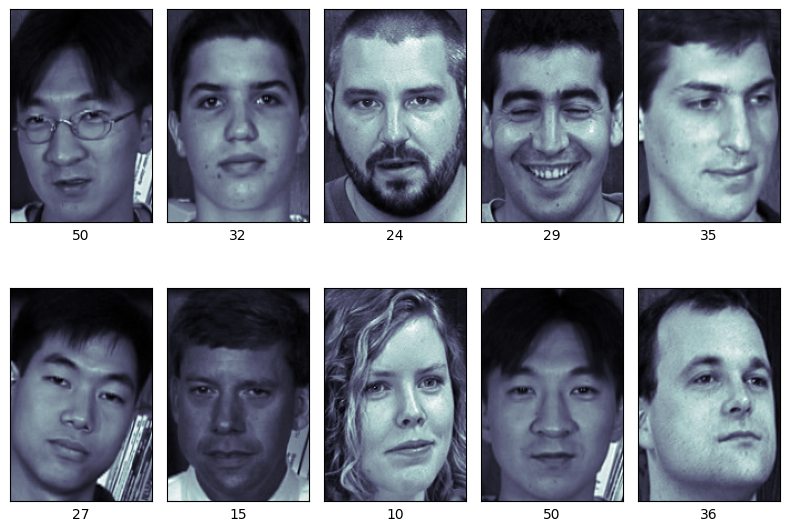

In [12]:
from pandas.core.algorithms import unique
# Split the dataset
Xtrain, Xtest, ytrain, ytest = train_test_split(imgGeorgia, label, test_size=0.2, random_state=96)

# Historgram
unique, count = np.unique(ytrain, return_counts=True)
plt.bar(unique, count)
plt.title('frequency distribution of each image class')
plt.xlabel('label')
plt.ylabel('count')
plt.show()

# Display images with labels
fig, ax = plt.subplots(2, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtrain[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=ytrain[i])

    fig.set_figwidth(8)
    fig.set_figheight(8)
    fig.tight_layout()

2.2 Eigenface Representation

In [13]:
from numpy import linalg as LA

# calculate D(trasnpose)*D to get eigenvalues and eigenvectors
sample, weight, height = (np.array(Xtrain)).shape
DT = (np.array(Xtrain)).reshape((sample, -1)) # (600,24576)
D = np.transpose(DT) # (24576,600)
DT_D = np.matmul(DT, D) # (600,600)

eigenvalues_unsorted, eigenvectors_unsorted = LA.eig(DT_D)

# save unsorted eigenfaces
eigenFaces_unsorted = eigenvectors_unsorted

eigenvalues, eigenvectors = zip(*sorted(zip(eigenvalues_unsorted, eigenvectors_unsorted), reverse = True))
print(eigenvalues)

(76655.24329636066, 3650.480765257176, 3527.8784185776226, 3478.9249473164277, 3451.2632038557645, 3436.8633152844263, 3399.354459267707, 3373.661383443396, 3349.8161520634567, 3291.304120294699, 3288.265801606699, 3274.1566115960227, 3249.213968579088, 3228.9098421176277, 3194.6435194946926, 3154.4884402674325, 3141.7678183489907, 3126.5701176702505, 3109.110335195629, 3099.238681774881, 3071.423808928519, 3044.11437899653, 3038.7648727607034, 3033.710992266432, 3022.7905457612287, 3002.7359678351186, 2988.1324347228356, 2965.012353810855, 2958.6204752606595, 2934.1202382121423, 2922.7808230712194, 2901.6322703813253, 2893.9196287576, 2869.951980468256, 2866.3588502871216, 2836.960861399406, 2818.1222835188833, 2810.1434364418233, 2798.9530140397937, 2791.6852313423356, 2763.3933449082556, 2740.3219863728323, 2726.5601397662545, 2722.953955308397, 2717.0400682747236, 2711.470214040803, 2692.7292589448107, 2660.56865337954, 2650.29329758237, 2638.954328053294, 2628.7418565129406, 2617.

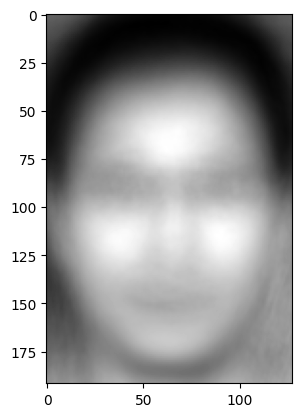

In [14]:
# Average face
DTMean = np.mean(DT, axis=0)

reshapeMean = DTMean.reshape((192,128))
plt.imshow(reshapeMean, cmap="gray")
plt.show()

2.2.1 Plot the Fraction of Total Variance vs. Number of Eigenvectors

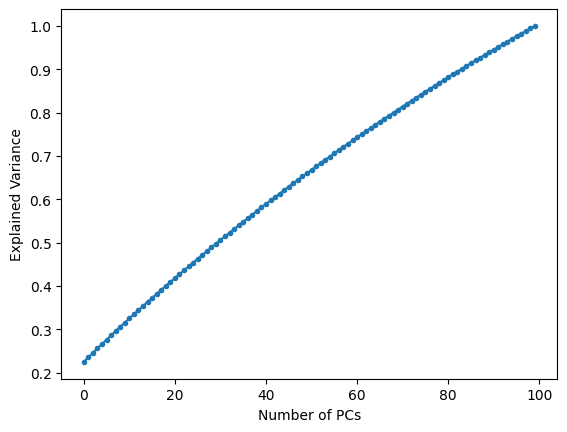

In [15]:
# get top 30 eigenvalues and eigenvectors
eigenvaluesTop100 = eigenvalues[:100]
eigenvectorsTop30 = eigenvectors[:30]

# compute explained_variance
explained_variance = eigenvaluesTop100 / np.sum(eigenvaluesTop100)

plt.figure()
plt.plot(np.cumsum(eigenvaluesTop100) / np.sum(eigenvaluesTop100),'.-')
plt.xlabel('Number of PCs')
plt.ylabel('Explained Variance')
plt.show()

2.2.2 Plot Normalized Variance (Eigenvalues) vs. Eigenvector Index

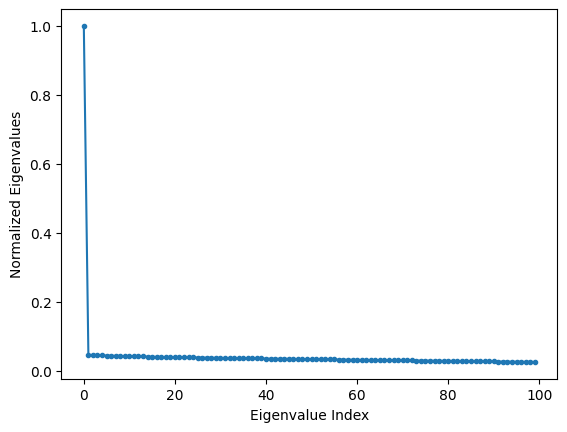

In [16]:
# compute normalized_eigenvalues
normalized_eigenvalues = explained_variance / explained_variance.max()

plt.figure()
plt.plot(normalized_eigenvalues,'.-')
plt.xlabel('Eigenvalue Index')
plt.ylabel('Normalized Eigenvalues')
plt.show()

2.2.3 Discuss the Need for All Eigenvectors




Retaining all eigenvectors ensures that we preserve the complete information content of the dataset. However, it may be unnecessary as lower-ranked eigenvectors often contribute less to overall variance.

In cases of variance explained, eigenvectors are sorted by their corresponding eigenvalues, which implies that a significant portion of the variance can often be captured by a subset of the top eigenvectors.

Retaining all eigenvectors increases computational costs, especially for high-dimensional datasets. Working with a subset of top eigenvectors can be practical and more efficient.


2.2.4 Display the First 5 Eigenfaces

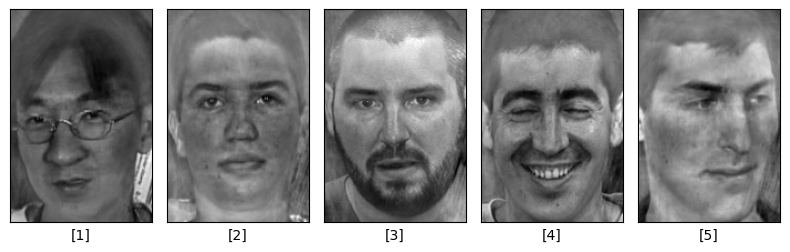

In [17]:
face_meaned = DT - DTMean
# projection
eigenvalues, eigenvectors
eigenFaces = eigenvectors[:100]
myLambda = np.dot(eigenFaces, face_meaned)

#eigenfaces = eigenvectors * (eigenvectors * face_mean_value) + face_mean_value
eigen_faces_trainx = np.dot(np.array(eigenFaces).T, myLambda).reshape(600, 192, 128) + face_meaned.reshape(600,192,128)

# Display images
fig, ax = plt.subplots(1, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(eigen_faces_trainx[i], cmap='gray')
    axi.set(xticks=[], yticks=[],
            xlabel=[i+1])

    fig.set_figwidth(8)
    fig.set_figheight(8)
    fig.tight_layout()

# **2.3 Face Recognition with Multiple Classifiers**

**Part A: Linear Support Vector Machine (SVM)**



In [18]:
from sklearn import svm
from sklearn import datasets
import matplotlib.pyplot as plt

# get xtrain ytrain
eigen_faces_trainx = eigen_faces_trainx.reshape(600, 192*128)
eigenfaces_train_y = ytrain.astype('int')

# get xtest, ytest
sample_test, weight_test, height_test = (np.array(Xtest)).shape
DT_test= (np.array(Xtest)).reshape((sample_test, -1)) # (600,24576)
D_test = np.transpose(DT_test) # (24576,600)
DT_D_test = np.matmul(DT_test, D_test) # (600,600)
eigenvalues_test_unsorted, eigenvectors_test_unsorted = LA.eig(DT_D_test)

 # sort eigenvalue and eigenvectors
eigenvalues_test, eigenvectors_test = zip(*sorted(zip(eigenvalues_test_unsorted, eigenvectors_test_unsorted), reverse = True))

# get top100 eigenvectors
eigenFaces_test = eigenvectors_test[:100]

DTMean_test = np.mean(DT_test, axis=0)
reshapeMean_test = DTMean_test.reshape((192,128))

face_meaned_test = DT_test - DTMean_test
# projection
myLambda_test = np.dot(eigenFaces_test, face_meaned_test)
x_test = np.dot(np.array(eigenFaces_test).T, myLambda_test) + face_meaned_test
ytest=ytest.astype('int')

In [19]:
# create model
SVM_linear = svm.SVC(kernel='linear', C= 0.01)
SVM_linear.fit(eigen_faces_trainx, eigenfaces_train_y.astype('int'))

print("Predicted Label:", SVM_linear.predict(x_test))
print("Actual Label:", ytest)
print("accuracy: ", SVM_linear.score(x_test, ytest.astype('int')))

Predicted Label: [50 19 16 22  2 15 38 21  5 48 24 16 15 47 25 21  1 18  5 34 10 31 42 46
 25 23 32 44  3 36 13 11 32 29 37 17  7 27  3 33 16 23  2  4 43 47 19 39
  5 25 20  5 26 11 41  4 28 47 11 32 47 17 22  7  6 26 36 19 27 42 20 40
 36  3 39 49 30 37  6 24 24  4 21 22 20  1 15 14  8 45 22 14  8 20 40 13
 36  8 38  7 36 22 25 41 29 23 36 16 44 10 15 24  3 25 17 33 47  6 48  9
 16 26 25 10 34 20 39 38 44 37 49 17 48 46 15 20  4 48 26 43 35 48  7 13
  8 25 44 10 47 29]
Actual Label: [50 19 16 22  2 15 38 21  5  9 24  4 15 47 25 21 35 18  5  9 45 31 42 18
 25 23 32 31  3  5  1 11 32  4 37 17 28 16  7 33 33  1  2  4 43 47 19 39
  5 32 20  5 18 11 41  4 28 47 11 32 47 17 22  7  6 26 36 19 27 42 20 40
 36  3 39 49 30 37  6 24 24  4 21 22 20  1 15 14  8 45 22 14  1 32 40 13
 36  8 38  7 36 22 25 41 14 23 36 16  4 10 15 24  3 25 17 33 47  6 48  9
 16 26 25 10 34 20 39 38 44 37 49 17 48 46 15 20  4 48 26 43 35 48  7 13
  8 25 44  6 47 29]
accuracy:  0.8533333333333334


'C' is my hyperparameter here. I chose C=0.01 because it maximizes the accuracy on the training data. This chosen value of C provides a balance, enabling a sufficiently wide margin while also placing significant emphasis on accurate classification.

**Part B: Random Forest Classifier**

In [20]:
# training
clf_RFC = RandomForestClassifier(n_estimators=100, max_depth=15, criterion='entropy')
clf_RFC.fit(eigen_faces_trainx, eigenfaces_train_y.astype('int'))

print("Predicted Label:", clf_RFC.predict(x_test))
print("Actual Label:", ytest)
print("accuracy: ", clf_RFC.score(x_test, ytest.astype('int')))

Predicted Label: [50 19 16 12  2 15 38 21 38 48 24 16 15 47 25 21  7 40 36  9 10 31 42 36
 25 23 32 44  3 21 13 11 32 29 37 17  7 16 14 16 16 23  2 23 25 46 19 39
  5 43 20  5 50 11 41 31 28 47 11 32 47 17 22  7 19 26 36 10 27 42 20 40
 36  3  2 49 13 37 19 24 24  4 21 22 15  1 15  5  8 45 22 14 41 43 37 13
 36  8 38  7 36 22 25 41  8 23 36 16 44 10 15 41  3 25 17 34 43  6 48  9
 27 26 25 10 34 20 39 38 15 37 49 17 48 46 15 25 32 48 26 43 35 30 10 13
  8 25 44 10 47 29]
Actual Label: [50 19 16 22  2 15 38 21  5  9 24  4 15 47 25 21 35 18  5  9 45 31 42 18
 25 23 32 31  3  5  1 11 32  4 37 17 28 16  7 33 33  1  2  4 43 47 19 39
  5 32 20  5 18 11 41  4 28 47 11 32 47 17 22  7  6 26 36 19 27 42 20 40
 36  3 39 49 30 37  6 24 24  4 21 22 20  1 15 14  8 45 22 14  1 32 40 13
 36  8 38  7 36 22 25 41 14 23 36 16  4 10 15 24  3 25 17 33 47  6 48  9
 16 26 25 10 34 20 39 38 44 37 49 17 48 46 15 20  4 48 26 43 35 48  7 13
  8 25 44  6 47 29]
accuracy:  0.6933333333333334


I chose my hyperparmeters n_estimators to be 100 and max_depth to be 15. n_estimators determines the number of decision trees in the forest, and when it's set to 100, my classifier has a diverse ensemble and leads to great generalization performance. max_depth helps prevent overfitting. By choosing max_depth=15, I have reasonably deep trees without becoming overly complex.

With these hyperparmeters, my random forest yields result with the highest accuracy.

**Part C: k-Nearest Neighbors (KNN) Classifier**




In [21]:
clf_KNN = KNeighborsClassifier(n_neighbors=9,algorithm='brute')
clf_KNN.fit(eigen_faces_trainx, eigenfaces_train_y.astype('int'))

print("Predicted Label:", clf_KNN.predict(x_test))
print("Actual Label:", ytest)
print("accuracy: ", clf_KNN.score(x_test, ytest.astype('int')))

Predicted Label: [50 19 44 22  2 15 38 21 30 48 24  4 15 47 25 21  1  1 36 35 30 31 42  6
 25 23 32 44 27 36  4 11 32 16 37 17  7 16  3 15 16  4  2  4 25 27  6 39
  5 25 20  5 16 11 41  4 35 47 11 32 47 17 22  7  6 26 36 19 43 42 32 40
 36  3 39 49 33 37  1 24 24  4 21 22 20  1 15  6  8 45 22 14  1 20 40 36
 36  8 38  7 36 22 25 41 48 23 36  4  4 10 15 24  3 25 17  9 50  6 48  9
 16 26 25 10 34 32 39 38 15 37 49 17 48 46 15 20  4 48 26 43 35 48 30 13
  8 20 44 10 47 35]
Actual Label: [50 19 16 22  2 15 38 21  5  9 24  4 15 47 25 21 35 18  5  9 45 31 42 18
 25 23 32 31  3  5  1 11 32  4 37 17 28 16  7 33 33  1  2  4 43 47 19 39
  5 32 20  5 18 11 41  4 28 47 11 32 47 17 22  7  6 26 36 19 27 42 20 40
 36  3 39 49 30 37  6 24 24  4 21 22 20  1 15 14  8 45 22 14  1 32 40 13
 36  8 38  7 36 22 25 41 14 23 36 16  4 10 15 24  3 25 17 33 47  6 48  9
 16 26 25 10 34 20 39 38 44 37 49 17 48 46 15 20  4 48 26 43 35 48  7 13
  8 25 44  6 47 29]
accuracy:  0.72


'K' is my hyperparameter here. When k=9, the KNN classifier gives result with the highest accuracy.

It balances the trade-off between considering enough number of neighbors for robust predictions while reducing the influence of outliers.

**Part D: Comparison and Analysis**

Considering the comparison of face-recognition accuracy among the three classifiers, I noticed the linear SVM classifier yields the highest level of precision in face recognition.

SVM:
  * Strength：
   1. Effective in high-dimensional spaces
   2. Can handle non-linear decision boundaries with kernel trick: Although it's called "linear," SVMs can handle non-linear patterns effectively using techniques like the kernel trick.
  * Weakness:
   1.  Sensitivity to feature scaling: Linear SVM is sensitive to the scale of features, which may require preprocessing steps like normalization.

Random Forest:
  * Strength:
    1. Ensemble learning for robustness: Random Forest combines multiple decision trees to reduce overfitting and improve generalization.
  * Weakness:
    1. Lower accuracy
    2. Slower training times compared to simple models

KNN:
  * Strength:
    1. Higher accuracy (compared to Random Forest)    
  * Weakness:
    1. Computationally intensive during prediction: As the size of the dataset grows, the cost of finding the K nearest neighbors can become computationally expensive.
    2. Sensitive to the choice of K  

Performance Comparison:

Linear SVM demonstrated high accuracy in face recognition, and it showed high computational efficiency. Random Forest exhibited slightly lower accuracy compared to SVM and is more computationally demanding. KNN exhibited accurate results, but is sensitive to the choice of the 'K' hyperparameter.

Preferred Use Cases:

Linear SVM is preferred when dealing with tasks with high-dimensional feature spaces and where computational resources are limited. Random Forest is preferred for tasks that requires robustness to variations in lighting and pose is crucial. KNN is preferred when dealing with smaller datasets and when the underlying data distribution is non-linear.

**Part E: Per-Class Accuracy and Histogram Analysis for Linear SVM**

In [22]:
from sklearn.metrics import confusion_matrix

y_true = ytest
y_pred = SVM_linear.predict(x_test)
matrix = confusion_matrix(y_true, y_pred)
matrix.diagonal()/matrix.sum(axis=1)

array([0.25      , 1.        , 1.        , 0.57142857, 0.8       ,
       0.75      , 0.75      , 1.        , 0.33333333, 1.        ,
       1.        , 1.        , 0.66666667, 1.        , 0.75      ,
       1.        , 0.33333333, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.5       , 1.        , 1.        , 0.5       ,
       0.6       , 0.66666667, 1.        , 0.5       , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.5       , 1.        ,
       1.        , 1.        , 1.        , 1.        ])

label: [1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50]
count: [11 13 12  8 10 11 11 12 12 13 12 15 13 12 10 11 11 12 12 10 12 10 13 11
  9 12 14 13 14 14 13 10 12 14 13 10 12 12 12 13 13 13 13 13 13 14  9 11
 13 14]


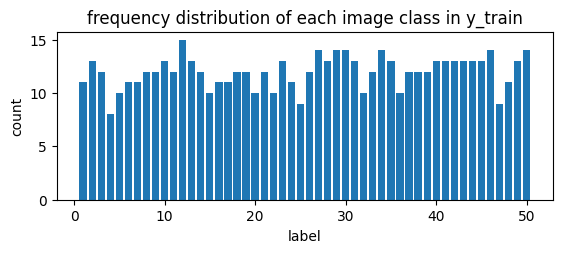

label: [ 1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50]
count: [4 2 3 7 5 4 4 3 3 2 3 2 3 5 4 4 3 3 5 3 5 2 4 6 3 1 2 1 1 2 5 3 1 2 5 3 3
 3 2 2 2 2 2 2 1 6 4 2 1]


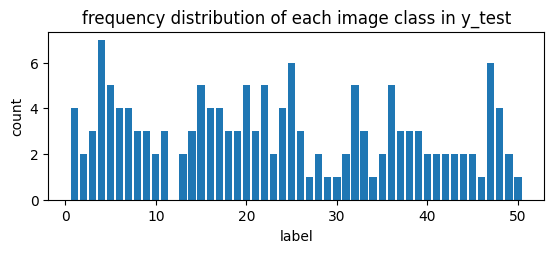

In [23]:
# Historgram of ytrain
unique, count = np.unique(ytrain, return_counts=True)
print('label:',unique)
print('count:',count)
plt.subplot(211)
plt.bar(unique, count)
plt.title('frequency distribution of each image class in y_train')
plt.xlabel('label')
plt.ylabel('count')
plt.show()

# Historgram of ytest
unique, count = np.unique(ytest, return_counts=True)
print('label:',unique)
print('count:',count)
plt.subplot(212)
plt.bar(unique, count)
plt.title('frequency distribution of each image class in y_test')
plt.xlabel('label')
plt.ylabel('count')
plt.show()

* Comparing the per-class accuracy values against the histograms of the frequency of both train data and test data, I found out that classes with higher per-class accuracy in the Linear SVM classifier corresponds to classes with higher counts in the training dataset histogram. Classes with lower per-class accuracy are those with lower counts in the training dataset histogram. Therefore, I could draw the conclusion that Linear SVM classifier is better at recognizing subjects that have a larger number of training samples than those with limited training samples.

* The per-class accuracy of the classifier appears to have a correlation with the frequency of samples in the training dataset. Classes with more training samples always shows higher accuracy, and classes with fewer samples always shows lower accuracy. Regarding to these correlations, I believe it is significant to have a balanced dataset for effective training of classifiers in face recognition tasks.